In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#importing the dataset
iris_flower_df = pd.read_csv("Iris_flowers_dataset.csv", names = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'iris_species'] )

In [3]:
iris_flower_df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_flower_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    object 
 2   petal_length  150 non-null    object 
 3   petal_width   150 non-null    object 
 4   iris_species  150 non-null    object 
dtypes: float64(1), object(4)
memory usage: 6.0+ KB


In [5]:
#changing object type to numeric
iris_flower_df['sepal_width'] = pd.to_numeric(iris_flower_df['sepal_width'],errors='coerce')
iris_flower_df['petal_length'] = pd.to_numeric(iris_flower_df['petal_length'],errors='coerce')
iris_flower_df['petal_width'] = pd.to_numeric(iris_flower_df['petal_width'],errors='coerce')

In [6]:
iris_flower_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  141 non-null    float64
 3   petal_width   142 non-null    float64
 4   iris_species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_flower_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,148.000000,141.000000,142.000000
mean,5.843333,3.055405,3.754610,1.197887
std,0.828066,0.436324,1.763052,0.770140
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_flower_df['iris_species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: iris_species, dtype: int64

In [9]:
#filling the missing values
iris_flower_df['sepal_width'].fillna(iris_flower_df['sepal_width'].mean(), inplace = True)
iris_flower_df['petal_length'].fillna(iris_flower_df['petal_length'].mean(), inplace = True)
iris_flower_df['petal_width'].fillna(iris_flower_df['petal_width'].mean(), inplace = True)

In [10]:
iris_flower_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris_flower_df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_species
0,5.1,3.500000,1.4,0.200000,Iris-setosa
1,4.9,3.055405,1.4,0.200000,Iris-setosa
2,4.7,3.200000,1.3,1.197887,Iris-setosa
3,4.6,3.100000,1.5,0.200000,Iris-setosa
4,5.0,3.600000,1.4,0.200000,Iris-setosa


In [12]:
#species mapping as numeric
species = {"Iris-setosa": 1, "Iris-virginica": 2, "Iris-versicolor": 3}
iris_flower_df.iris_species = [species[item] for item in iris_flower_df.iris_species]

In [13]:
iris_flower_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,iris_species
145,6.7,3.0,5.2,2.300000,2
146,6.3,2.5,5.0,1.900000,2
147,6.5,3.0,5.2,2.000000,2
148,6.2,3.4,5.4,2.300000,2
149,5.9,3.0,5.1,1.197887,2


In [14]:
iris_flower_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_species  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [15]:
#counting the number of result of each species
iris_flower_df['iris_species'].value_counts()

3    50
2    50
1    50
Name: iris_species, dtype: int64

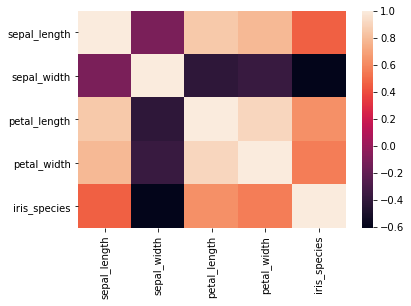

In [16]:
#checking the correlation between the columns of dataset
import seaborn as sns
sns.heatmap(iris_flower_df.corr())

In [17]:
#distinguishing the dataset without result
X = iris_flower_df.drop(['iris_species'], axis=1)
y = iris_flower_df.iris_species

In [18]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [19]:
#importing and applying KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [20]:
## score that comes from testing on the datapoints to be used for testing
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 92.10526315789474 % and k = [2]


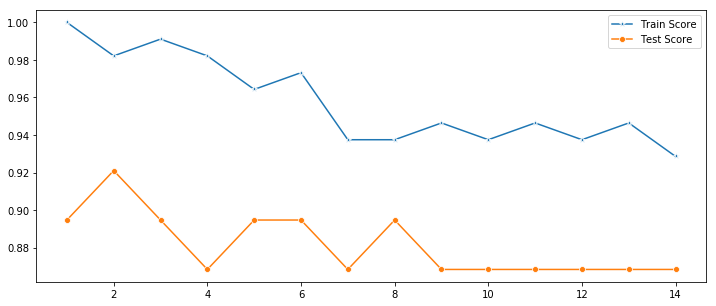

In [21]:
#plotting the result
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [22]:
#fitting the KNN model and getting the accuracy result
knn = KNeighborsClassifier(2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9210526315789473

In [23]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#getting the predictions using the KNN classifier
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,All
True,,,,
1,12,0,0,12
2,0,10,3,13
3,0,0,13,13
All,12,10,16,38


Text(0.5,15,'Predicted label')

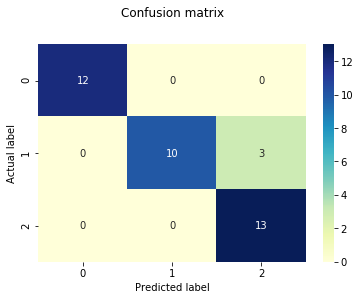

In [24]:
#graphing the confusion matrix
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
#importing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.77      0.87        13
           3       0.81      1.00      0.90        13

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



In [26]:
#importing Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [27]:
#fitting the model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
#predicting the results
y_pred = classifier.predict(X_test)

In [29]:
#checking accuracy score
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(accuracy_score(y_test, y_pred))

[[12  0  0]
 [ 0  9  4]
 [ 0  1 12]]
0.868421052631579
